In [1]:
import pandas as pd

In [2]:

df = pd.read_csv('iter-skewed-simulated.csv')


In [3]:
df


,Refs,Reads
0,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...,ACCATAATGCGTGGGGCCGACCTCGGAATGCGGTCTCCATGCGCGT...
1,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...,TCGAAGCAGTAGGGCCTACCAAATAGGTTGGTCCTCCGTTGTATCT...
2,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...,AGTTAACGTCCCACGGCGAGGCACTCTTGATCCCCACCTTCAAGAG...
3,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...,GCCCAAGGGTACGCCCGCAGCGACGCAATTGGCGGAGTAAGCGCGT...
4,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...,GCACTGATGTAACTCATGGTACATCCGTCGCTGAGCGCCATTTTGT...
...,...,...
1915,TGTCCAGTTTTTCGTTCTAGCGAGGGGCGGATCTTTGTGCTTAGCG...,TGTCCAGTTTTTCGTTCTAGCGAGGGGCGGATCTTTGTGCTTAGCG...
1916,AACGCGTCTTCACCGAAAGGAACTCTCTCCATTTAGTGGCGTTTTA...,AACGCGTCTTCACCGAAAGGAACTCTCTCCATTTAGTGGCGTTTTA...
1917,TTTCGGCGCCGACTCTGTGGGTTCTGGAAGTCTCTACGCTCTGTTA...,TTTCGGCGCCGACTCTGTGGGTTCTGGAAGTCTCTACGCTCTGTTA...
1918,CAATACTCTGGGGTACCCGTTGGGGCACCGTATGATGATCTCTGAA...,CAATACTCTGGGGTACCCGTTGGGGCACCGTATGATGATCTCTGAA...


In [4]:
from tqdm import tqdm


In [5]:
noisy_strands = [s.strip() for s in list(df['Reads'])]


In [6]:
ref_strands = [s.strip() for s in list(df['Refs'])]


In [7]:
import difflib


In [8]:
def print_diff(ref_strand, noisy_strand):
    global pairs
    a, b = 0, 0

    # quadratic time, no heuristics
    for match in difflib.SequenceMatcher(None, ref_strand, noisy_strand, autojunk=False).get_matching_blocks():
        was = ref_strand[a:match.a]
        now = noisy_strand[b:match.b]
        
        a = match.a + match.size
        b = match.b + match.size
        
        if was == '' and now == '':
            pass
        else:
            # print('{}|{}'.format(was, now), end=', ')
            pairs += [(was, now, match.a)]
            
        
    #print('')


In [9]:
pairs = []

for i in tqdm(range(len(ref_strands))):
    if ref_strands[i] != noisy_strands[i]:
        #print(i, end=': ')
        print_diff(ref_strands[i], noisy_strands[i])


100%|██████████| 1920/1920 [00:00<00:00, 50384.24it/s]


In [10]:
import numpy as np


In [11]:
subs, counts = np.unique(pairs, return_counts=True, axis=0)
sorting = np.argsort(counts)
subs = subs[sorting]
counts = counts[sorting]


In [12]:
for sub, count in zip(subs, counts):
    if count > 5:
        print("{} -> {} @ {}".format(sub[0], sub[1], sub[2]), count)


In [13]:
def get_key(char1, char2):
    char1 = char1 if char1 != '' else '_'
    char2 = char2 if char2 != '' else '_'
    return char1 + char2

strand_len = 110
pos_map = {}
pos_counts = [0] * (strand_len + 1)
for sub, count in zip(subs, counts):
    key = get_key(sub[0], sub[1])
    if key not in pos_map:
        pos_map[key] = [0] * (strand_len + 1)
    pos_map[key][int(sub[2])] += count

print(pos_map['_T'])

[1, 3, 0, 2, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 1, 2, 3, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0, 1, 1, 1, 1, 1, 0, 3, 1, 1, 2, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 2, 2, 3, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 4, 0, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 3, 0, 0, 5, 11]


In [14]:
import matplotlib.pyplot as plt

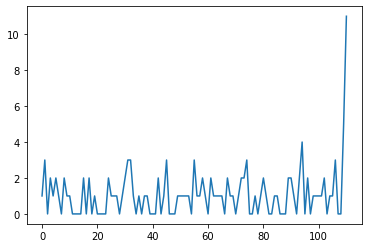

In [15]:
keys = ['G_', '_T', 'C_', '_G', '_A', '_TC']
for key in keys:
    plt.plot(range(strand_len + 1), pos_map[key])

In [16]:
np.save('subs.npy', subs)
np.save('counts.npy', counts)